# Preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('customer_segmentation_data.csv')

In [3]:
# Check for missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [4]:
# Display the first few rows
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [5]:
# Check for duplicate rows
df.duplicated().sum()

0

In [6]:
# Check for nuull values
print("Null values:")
df.isnull().sum()

Null values:


id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64

In [7]:
# Descriptive statistics for numeric columns
print("Descriptive Statistics for Numeric Columns:")
df.describe()

Descriptive Statistics for Numeric Columns:


,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,288.819436,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,1.000000,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,250.750000,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,500.500000,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,750.250000,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,1000.000000,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


In [8]:
# Summary of unique values for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("Value Counts for Categorical Columns:")
for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())

Value Counts for Categorical Columns:

Column: gender
gender
Male      357
Other     327
Female    316
Name: count, dtype: int64

Column: preferred_category
preferred_category
Electronics      215
Sports           210
Home & Garden    206
Groceries        199
Clothing         170
Name: count, dtype: int64


In [9]:
df.columns

Index(['id', 'age', 'gender', 'income', 'spending_score', 'membership_years',
       'purchase_frequency', 'preferred_category', 'last_purchase_amount'],
      dtype='object')

In [10]:
df.nunique()

id                      1000
age                       52
gender                     3
income                   996
spending_score           100
membership_years          10
purchase_frequency        50
preferred_category         5
last_purchase_amount     994
dtype: int64

# EDA

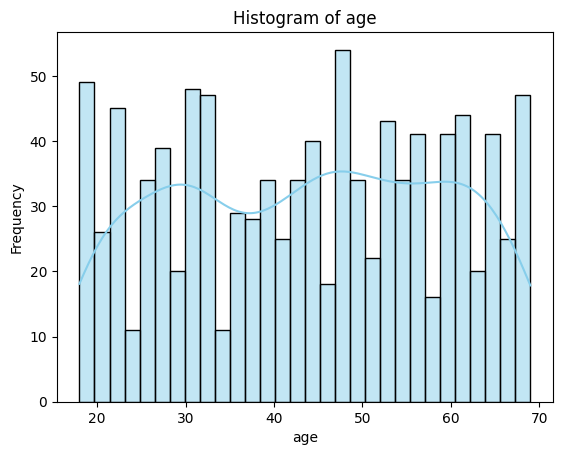

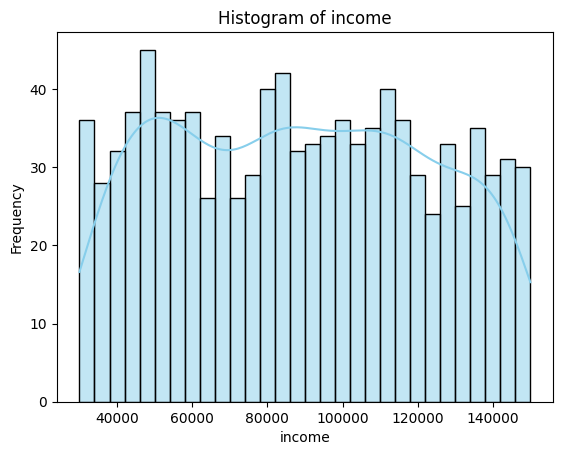

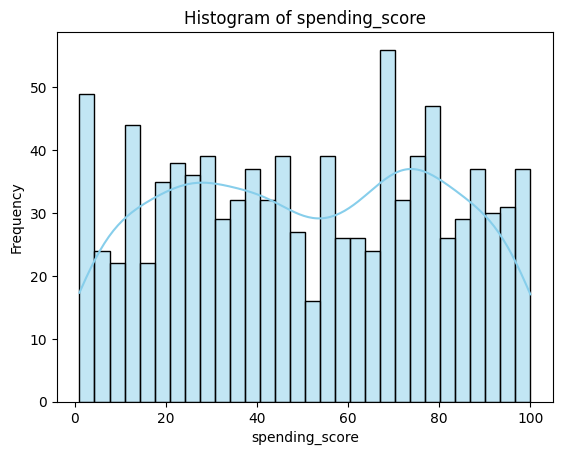

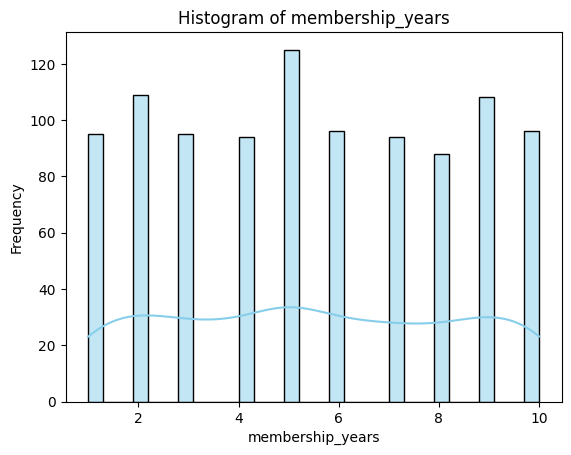

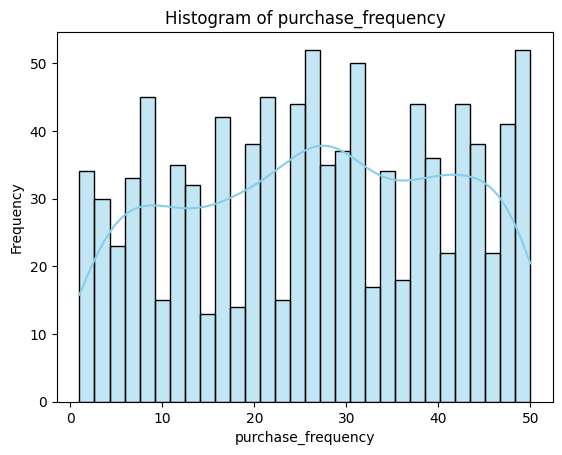

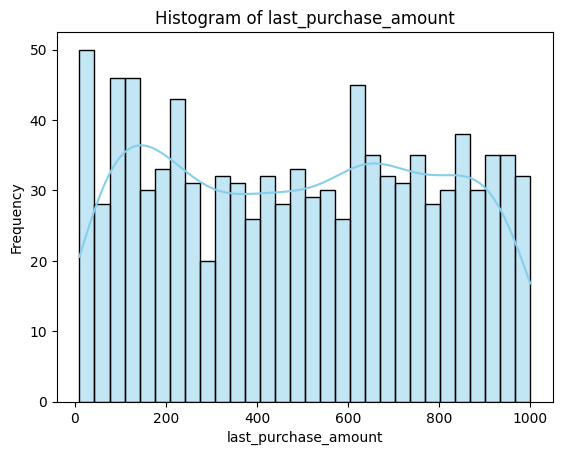

In [11]:
# 1. Histogram for numeric columns
numeric_cols = ['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']
for col in numeric_cols:
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

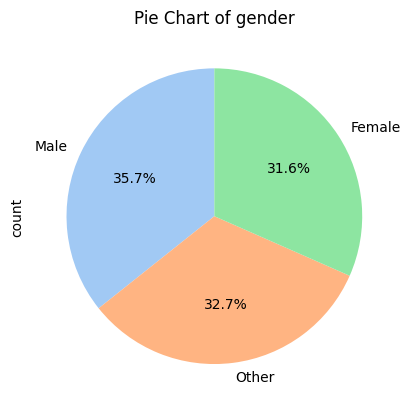

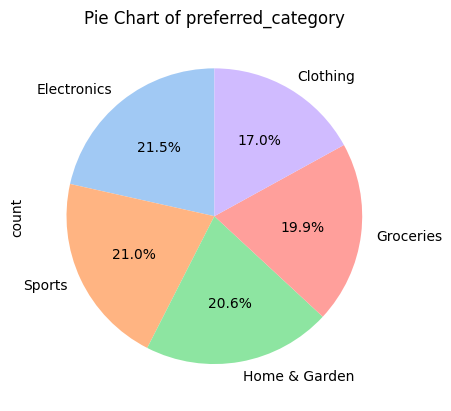

In [12]:
# 4. Pie chart for categorical columns
categorical_cols = ['gender', 'preferred_category']
for col in categorical_cols:
    df[col].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"), startangle=90)
    plt.title(f"Pie Chart of {col}")
    plt.show()

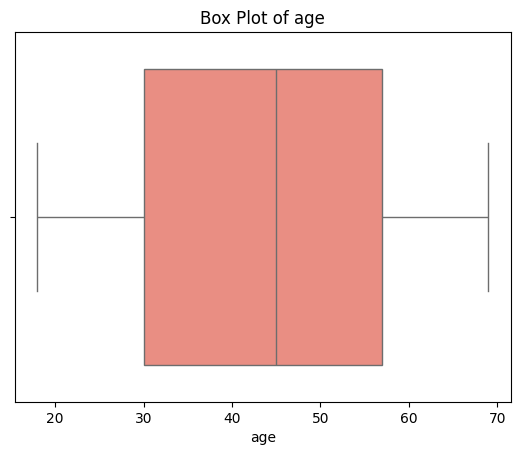

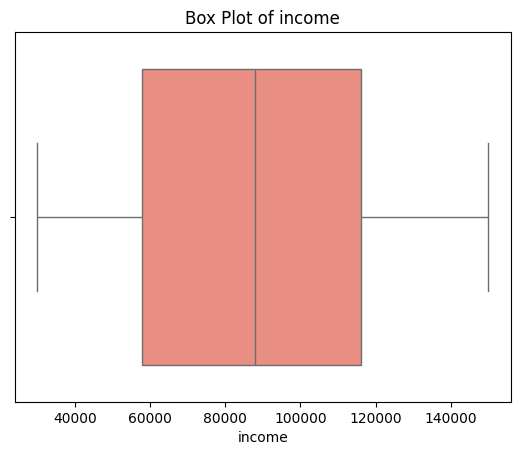

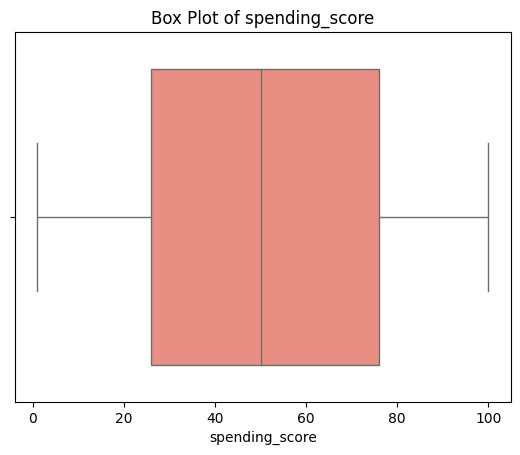

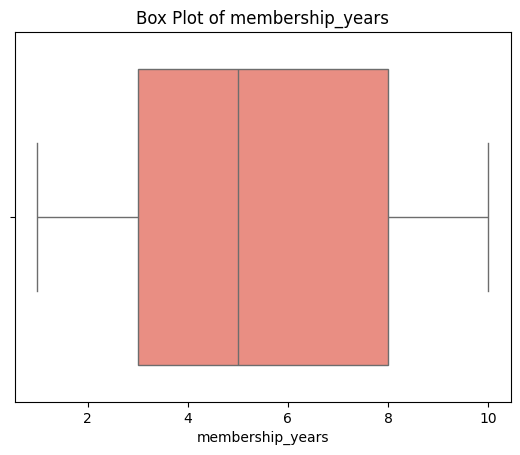

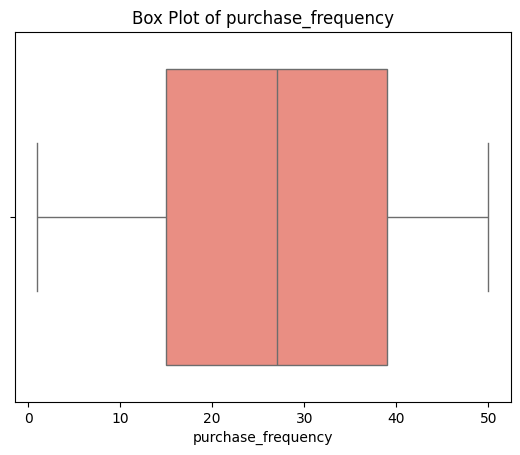

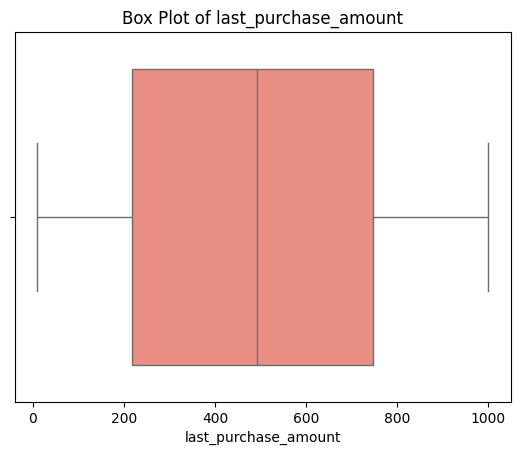

In [13]:
# 5. Boxplot for numeric columns to check outliers
for col in numeric_cols:
    sns.boxplot(x=df[col], color="salmon")
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)
    plt.show()

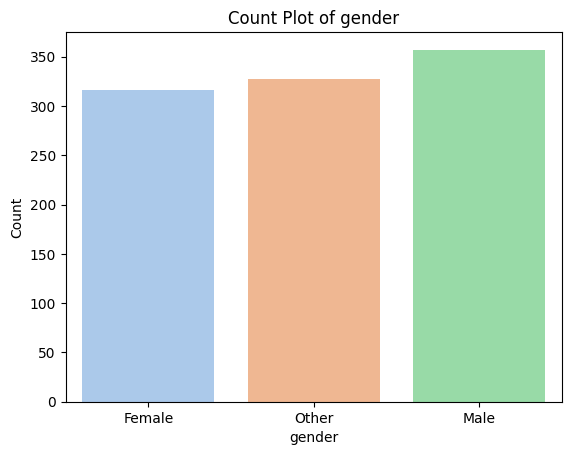

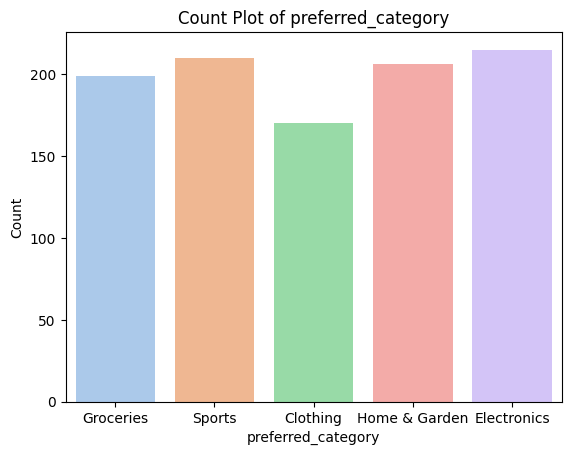

In [14]:
import warnings
warnings.filterwarnings('ignore')
# 6. Countplot for categorical columns
for col in categorical_cols:
    sns.countplot(x=df[col], palette="pastel")
    plt.title(f"Count Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

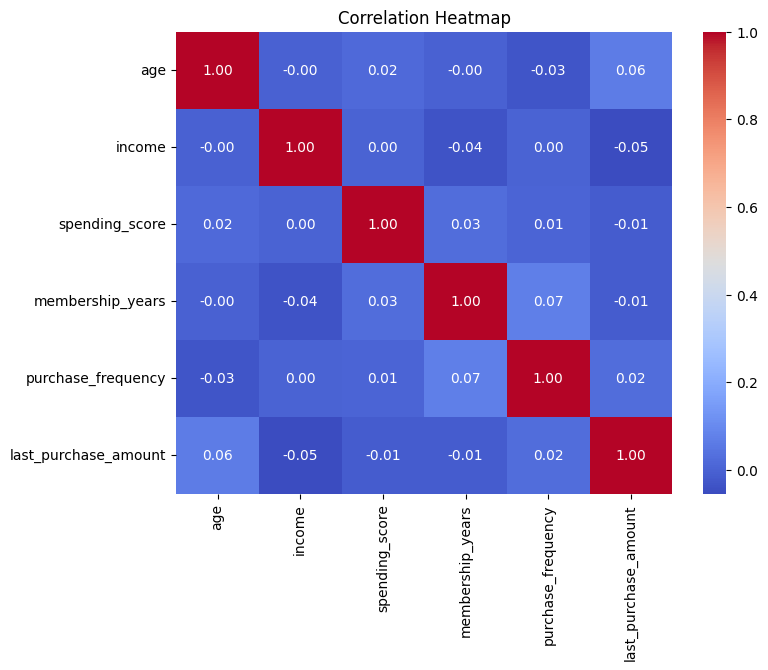

In [15]:
# 7. Correlation heatmap for numeric columns
plt.figure(figsize=(8, 6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Feature Engineering

In [16]:
# Combining income, purchase frequency, and membership years to estimate CLV
df['customer_lifetime_value'] = (df['income'] * df['purchase_frequency'] * df['membership_years']) / 100000

In [17]:
# Average Purchase Amount: Calculating average purchase amount per transaction
df['avg_purchase_amount'] = df['last_purchase_amount'] / df['purchase_frequency']

In [18]:
# Income Brackets: Categorizing income into Low, Medium, and High
df['income_bracket'] = pd.cut(df['income'], 
                              bins=[0, 50000, 100000, np.inf], 
                              labels=['Low', 'Medium', 'High'])

In [19]:
# Spending Habits: Categorizing spending_score into Low, Medium, and High spenders
df['spending_habit'] = pd.cut(df['spending_score'], 
                              bins=[0, 33, 66, 100], 
                              labels=['Low', 'Medium', 'High'])

In [20]:
# Loyalty Score: Combining membership years and purchase frequency to create a loyalty score
df['loyalty_score'] = df['membership_years'] * df['purchase_frequency']

In [21]:
# Preferred Category Dependency (Optional Insight): Check if certain categories correlate with high spending or loyalty
category_insights = df.groupby('preferred_category')[['spending_score', 'loyalty_score']].mean()

In [22]:
# Displaying the modified dataframe and category insights
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,customer_lifetime_value,avg_purchase_amount,income_bracket,spending_habit,loyalty_score
0,1,38,Female,99342,90,3,24,Groceries,113.53,71.52624,4.730417,Medium,High,72
1,2,21,Female,78852,60,2,42,Sports,41.93,66.23568,0.998333,Medium,Medium,84
2,3,60,Female,126573,30,2,28,Clothing,424.36,70.88088,15.155714,High,Low,56
3,4,40,Other,47099,74,9,5,Home & Garden,991.93,21.19455,198.386000,Low,High,45
4,5,65,Female,140621,21,3,25,Electronics,347.08,105.46575,13.883200,High,Low,75


In [23]:
df.describe()

,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,customer_lifetime_value,avg_purchase_amount,loyalty_score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670,130.551044,37.979564,148.279000
std,288.819436,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253,123.557436,78.405601,119.953433
min,1.000000,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000,0.797210,0.291277,1.000000
25%,250.750000,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500,39.114750,8.876500,48.000000
50%,500.500000,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000,89.501220,18.199597,113.000000
75%,750.250000,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000,191.138175,34.802880,217.000000
max,1000.000000,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000,672.435000,962.900000,500.000000


In [24]:
category_insights

,spending_score,loyalty_score
preferred_category,,
Clothing,51.976471,143.911765
Electronics,50.297674,158.790698
Groceries,51.256281,146.105528
Home & Garden,49.135922,139.140777
Sports,51.014286,152.076190


In [25]:
category_insights_2 = df.groupby('income_bracket')[['spending_score', 'loyalty_score']].mean()

In [26]:
category_insights_2

,spending_score,loyalty_score
income_bracket,,
Low,50.252809,156.629213
Medium,50.838863,145.016588
High,50.715000,148.005000


In [27]:
# Define age bins and labels
age_bins = [18, 30, 45, 60, 100]
age_labels = ['18-30', '31-45', '46-60', '61+']

In [28]:
# Create an Age Group column
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

In [29]:
# Group by age group and calculate the average spending and loyalty scores
df.groupby('age_group')[['spending_score', 'loyalty_score']].mean()

,spending_score,loyalty_score
age_group,,
18-30,48.401786,152.683036
31-45,54.202247,149.640449
46-60,48.925566,150.611650
61+,51.265000,137.925000


In [30]:
df

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,customer_lifetime_value,avg_purchase_amount,income_bracket,spending_habit,loyalty_score,age_group
0,1,38,Female,99342,90,3,24,Groceries,113.53,71.52624,4.730417,Medium,High,72,31-45
1,2,21,Female,78852,60,2,42,Sports,41.93,66.23568,0.998333,Medium,Medium,84,18-30
2,3,60,Female,126573,30,2,28,Clothing,424.36,70.88088,15.155714,High,Low,56,61+
3,4,40,Other,47099,74,9,5,Home & Garden,991.93,21.19455,198.386000,Low,High,45,31-45
4,5,65,Female,140621,21,3,25,Electronics,347.08,105.46575,13.883200,High,Low,75,61+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,57,Male,112170,57,6,1,Clothing,313.64,6.73020,313.640000,High,Medium,6,46-60
996,997,23,Other,65337,76,10,23,Groceries,632.83,150.27510,27.514348,Medium,High,230,18-30
997,998,23,Male,113097,40,5,42,Sports,75.09,237.50370,1.787857,High,Medium,210,18-30
998,999,22,Female,113695,63,7,44,Electronics,505.16,350.18060,11.480909,High,Medium,308,18-30


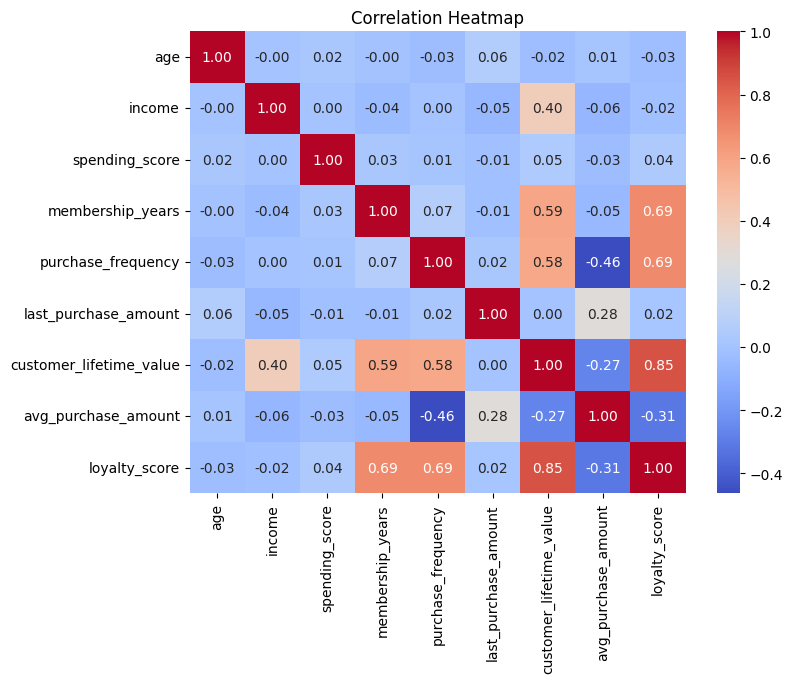

In [31]:
numeric_cols = ['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount', 'customer_lifetime_value', 'avg_purchase_amount','loyalty_score']
# 7. Correlation heatmap for numeric columns
plt.figure(figsize=(8, 6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Decision Tree Classifier

In [32]:
# Segmenting customers into "High", "Medium", "Low" based on their lifetime value
df['customer_segment'] = pd.cut(df['customer_lifetime_value'], 
                                bins=[-float('inf'), 100, 500, 1000, float('inf')], 
                                labels=['Low', 'Medium', 'High', 'Very High'])

In [33]:
# Features for segmentation
X = df[['income', 'membership_years', 'purchase_frequency']]

In [34]:
# Target variable
y = df['customer_segment']

In [35]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [37]:
# Predict on the test set
y_pred = clf.predict(X_test)

In [38]:
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00         2
         Low       0.93      0.97      0.95       113
      Medium       0.96      0.91      0.93        85

    accuracy                           0.94       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.95      0.94      0.94       200



In [39]:
print(confusion_matrix(y_test, y_pred))

[[  2   0   0]
 [  0 110   3]
 [  0   8  77]]


In [40]:
# Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

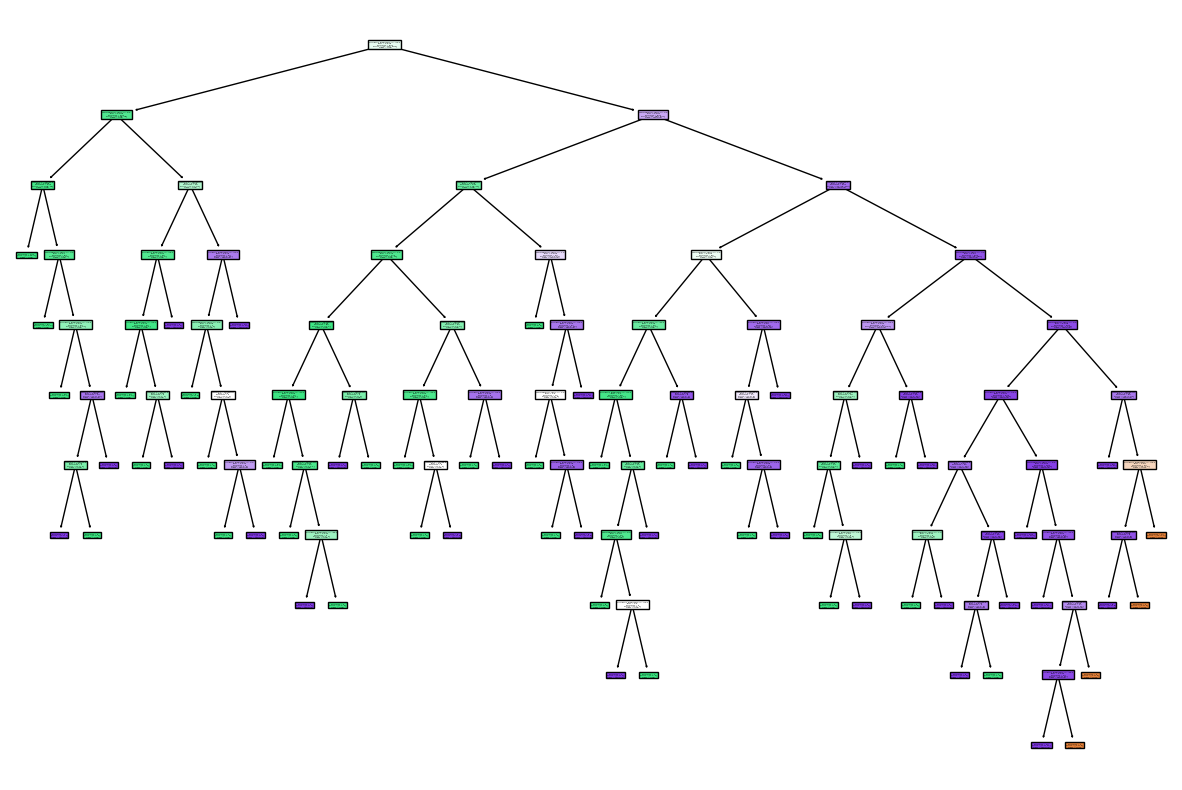

In [41]:
plt.figure(figsize=(15,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_)
plt.show()

# Decision Tree Regressor

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [43]:
# Split the data into features and target
X = df.drop(columns=['customer_lifetime_value'])  # Features
y = df['customer_lifetime_value']  # Target

In [44]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in ['gender', 'preferred_category','income_bracket','spending_habit','age_group','customer_segment']:
    X[column] = label_encoder.fit_transform(X[column])

In [45]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Train a Decision Tree Regressor with grid search
param_grid = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [47]:
# Best model from grid search
best_model = grid_search.best_estimator_

In [48]:
# Predict on the test set
y_pred = best_model.predict(X_test)

In [49]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [50]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 9.219175213843794
Mean Squared Error: 223.813520657891
R² Score: 0.9816481297623227


In [51]:
# Feature importance
feature_importances = best_model.feature_importances_
sorted_features = sorted(zip(feature_importances, X.columns), reverse=True)

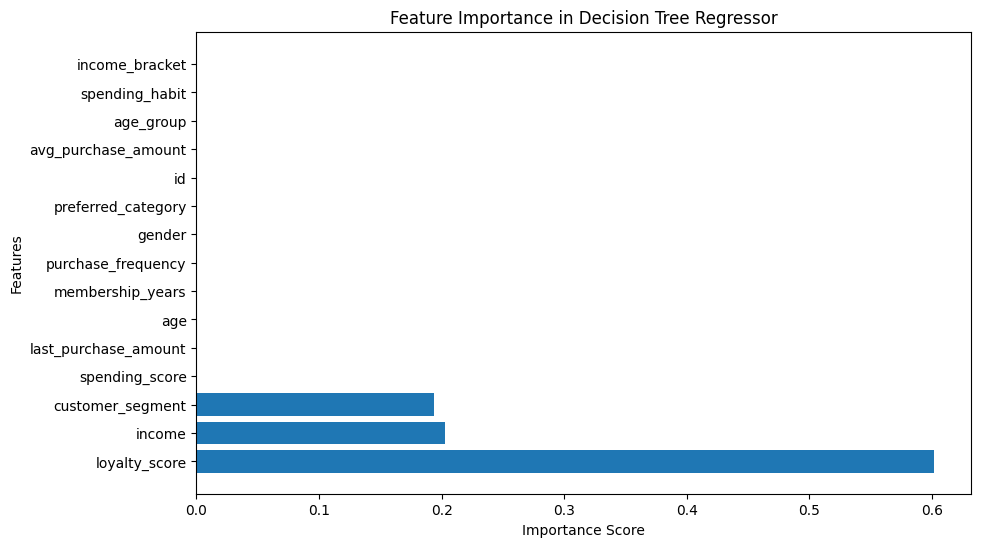

In [52]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh([f[1] for f in sorted_features], [f[0] for f in sorted_features])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in Decision Tree Regressor')
plt.show()

# Removing the less important feature to prevent overfitting for better results

In [53]:
# Remove low-importance features and retrain
important_features = [f[1] for f in sorted_features if f[0] > 0.05]
X_train_imp = X_train[important_features]
X_test_imp = X_test[important_features]

In [54]:
best_model.fit(X_train_imp, y_train)
y_pred_imp = best_model.predict(X_test_imp)

In [55]:
# Evaluate reduced model
mae_imp = mean_absolute_error(y_test, y_pred_imp)
mse_imp = mean_squared_error(y_test, y_pred_imp)
r2_imp = r2_score(y_test, y_pred_imp)

In [56]:
print("\nReduced Model Evaluation:")
print(f"Mean Absolute Error: {mae_imp}")
print(f"Mean Squared Error: {mse_imp}")
print(f"R² Score: {r2_imp}")


Reduced Model Evaluation:
Mean Absolute Error: 8.274288342559524
Mean Squared Error: 180.95662433095072
R² Score: 0.9851622347094666


# Customer Loyalty Program

In [57]:
gold_threshold = 75
silver_threshold = 50

In [58]:
# Create a new column to assign loyalty tiers based solely on the loyalty score
def assign_loyalty_tier(score):
    if score >= gold_threshold:
        return 'Gold'
    elif score >= silver_threshold:
        return 'Silver'
    else:
        return 'Bronze'

In [59]:
# Apply the function to the loyalty_score column
df['loyalty_tier'] = df['loyalty_score'].apply(assign_loyalty_tier)

In [60]:
# Display the dataframe with the new loyalty tiers
print(df[['id', 'loyalty_score', 'loyalty_tier']].head())

   id  loyalty_score loyalty_tier
0   1             72       Silver
1   2             84         Gold
2   3             56       Silver
3   4             45       Bronze
4   5             75         Gold


In [61]:
# Define reward mechanisms for each loyalty tier
reward_mapping = {
    'Gold': '10% Discount, Free Shipping, Early Access',
    'Silver': '5% Discount, Free Shipping',
    'Bronze': '1% Discount'
}

In [62]:
# Assign rewards to each customer based on their loyalty tier
df['rewards'] = df['loyalty_tier'].map(reward_mapping)

In [63]:
# Display rewards for each customer
df[['id', 'loyalty_tier', 'rewards']].head()

,id,loyalty_tier,rewards
0,1,Silver,"5% Discount, Free Shipping"
1,2,Gold,"10% Discount, Free Shipping, Early Access"
2,3,Silver,"5% Discount, Free Shipping"
3,4,Bronze,1% Discount
4,5,Gold,"10% Discount, Free Shipping, Early Access"


# Forecasting Sales

In [64]:
# Calculate the sales as a new column
df['sales'] = df['purchase_frequency'] * df['avg_purchase_amount']
# View the first few rows to verify the calculation
print(df[['id', 'purchase_frequency', 'avg_purchase_amount', 'sales']].head())

   id  purchase_frequency  avg_purchase_amount   sales
0   1                  24             4.730417  113.53
1   2                  42             0.998333   41.93
2   3                  28            15.155714  424.36
3   4                   5           198.386000  991.93
4   5                  25            13.883200  347.08


In [65]:
# Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Encoding categorical variables
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['preferred_category'] = label_encoder.fit_transform(df['preferred_category'])
df['income_bracket'] = label_encoder.fit_transform(df['income_bracket'])
df['spending_habit'] = label_encoder.fit_transform(df['spending_habit'])
df['age_group'] = label_encoder.fit_transform(df['age_group'])
df['customer_segment'] = label_encoder.fit_transform(df['customer_segment'])
df['loyalty_tier'] = label_encoder.fit_transform(df['loyalty_tier'])

# Features to use for prediction
features = ['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 
            'last_purchase_amount', 'customer_lifetime_value', 'avg_purchase_amount',
            'income_bracket', 'spending_habit', 'loyalty_score', 'age_group', 'customer_segment', 
            'loyalty_tier']

# Scaling the features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Target variable (e.g., sales prediction could be based on customer lifetime value or last purchase amount)
target = 'sales'  # Replace with the target you want to predict

# Splitting data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Initialize and train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model (e.g., using R^2 score and Mean Absolute Error)
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 0.8961234999999573
R^2 Score: 0.9999847198022045


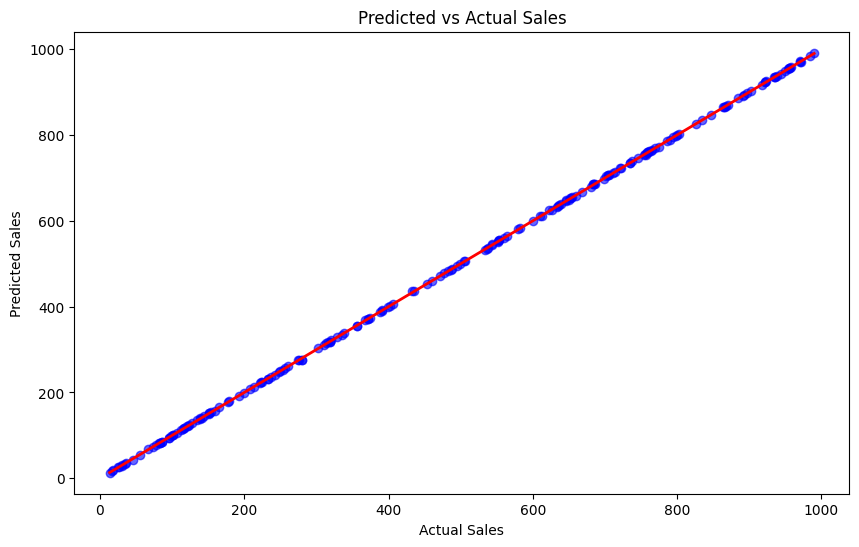

In [67]:
# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Predicted vs Actual Sales')
plt.show()

# Targeted Marketing

In [76]:
import random
from sklearn.cluster import KMeans

# Define a function to predict the customer’s cluster based on their preferences
def predict_cluster(age_group, gender, income_bracket, spending_habit, loyalty_tier, df):
    # Filter the dataset based on the provided preferences
    predicted_cluster = df[(df['age_group'] == age_group) &
                           (df['gender'] == gender) &
                           (df['income_bracket'] == income_bracket) &
                           (df['spending_habit'] == spending_habit) &
                           (df['loyalty_tier'] == loyalty_tier)]
    
    # If there are multiple rows, take the most common cluster value
    if not predicted_cluster.empty:
        return predicted_cluster['cluster'].mode()[0]
    else:
        return random.choice(df['cluster'].unique())  # Default to a random cluster if no exact match is found

# Create a mapping of clusters to preferred categories
cluster_to_category = {
    0: 'Electronics',
    1: 'Groceries',
    2: 'Sports',
    3: 'Clothing',
    4: 'Home & Garden'
}

# Define a function to recommend products based on predicted cluster
def recommend_product(cluster_id, cluster_to_category):
    # Map the cluster to a category
    preferred_category = cluster_to_category.get(cluster_id, 'Unknown category')
    
    # Recommend the most common category within the cluster
    recommendation = f"Based on your profile, we recommend products in the '{preferred_category}' category."
    
    return recommendation

# Simulate a customer's query based on their preferences
def customer_query(df):
    print("Please enter your details:")
    
    # Take user input for their preferences
    age_group = input("Enter your age group (18-30, 31-45, 46-60, 61+): ")
    gender = input("Enter your gender (Male, Female, Other): ")
    income_bracket = input("Enter your income bracket (Low, Medium, High): ")
    spending_habit = input("Enter your spending habit (Low, Medium, High): ")
    loyalty_tier = input("Enter your loyalty tier (Bronze, Silver, Gold): ")
    
    # Predict the customer's cluster based on their profile
    predicted_cluster = predict_cluster(age_group, gender, income_bracket, spending_habit, loyalty_tier, df)
    
    # Provide a recommendation based on the predicted cluster
    recommendation = recommend_product(predicted_cluster, cluster_to_category)
    
    print(f"\nBased on your preferences, we recommend: {recommendation}")

# Perform clustering (if not already done)
features = df[['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency']]  # Modify this as needed
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(features)

# Run the customer query
customer_query(df)


Please enter your details:


Enter your age group (18-30, 31-45, 46-60, 61+):  46-60
Enter your gender (Male, Female, Other):  Other
Enter your income bracket (Low, Medium, High):  Medium
Enter your spending habit (Low, Medium, High):  Low
Enter your loyalty tier (Bronze, Silver, Gold):  Gold



Based on your preferences, we recommend: Based on your profile, we recommend products in the 'Electronics' category.
